In [43]:
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from matplotlib import pyplot as plt
import numpy as np

# Olevitti Dataset:

In [44]:
olive=datasets.fetch_olivetti_faces()                   #this will download olivetti faces
olive

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [45]:
olive.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [46]:
olive["data"].shape                  #400 images(data points), 4096 pixels of each image(features)

(400, 4096)

In [47]:
olive["images"].shape                #400 images, each is 64*64

(400, 64, 64)

# ##Plotting Olevitti Images:

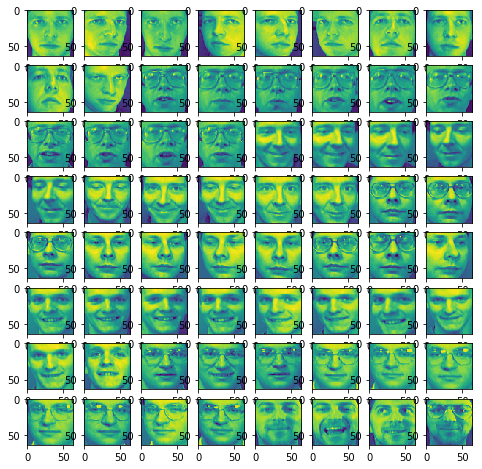

In [48]:
fig=plt.figure(figsize=(8,8))   #we will draw partition this figure into 8 rows and 8 cols and each part will contain 1 figure
for i in range(64):                                #so, we are only drawing 64 images instead of entire 400
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(olive.images[i])                                    #plotting the images in each partiton of he figure
plt.show()

In [49]:
x=olive.data
y=olive.target

# Applying PCA:

In [52]:
pca=PCA()
x1=pca.fit_transform(x)
x1.shape
#fit tranform will return transformed data(however, x isn't changed), fit doesn't return anything                      
#since datapoints are only 400 and features 4096, and we haven't given n_components argument to PCA,
#we get min(400,4096) as n_components

#we don't need to do feature scaling before aplying pca on images as all data(pixel values) lie in the same range

(400, 400)

In [34]:
k=0
total_variance=pca.explained_variance_.sum()
cur_variance=0
while cur_variance/total_variance<0.99:
    cur_variance+=pca.explained_variance_[k]
    k+=1
k                                               #this means that 260 features are enough to get 99% info. back

260

In [35]:
pca=PCA(n_components=k)
x_new=pca.fit_transform(x)
x_new.shape

(400, 260)

# Getting Original Data Back(inverse_transform())

In [36]:
x_approx=pca.inverse_transform(x_new)
x_approx.shape

(400, 4096)

In [37]:
#right now we have x_approx as 4096 features, but to plot the images, we need it in the form of 64*64
x_approx_images=x_approx.reshape(400,64,64)
x_approx_images.shape

(400, 64, 64)

# Plotting Approximate Images:

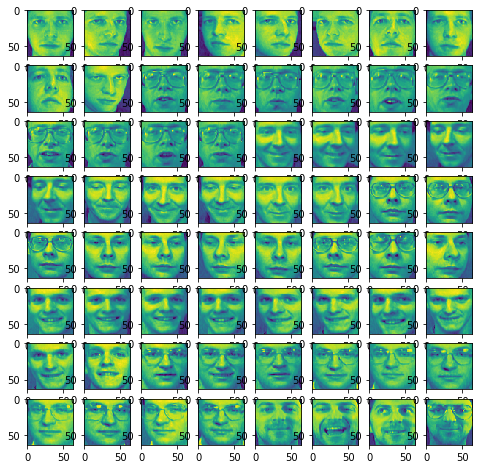

In [38]:
fig=plt.figure(figsize=(8,8))   
for i in range(64):                                
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i])                                   
plt.show()              
#see that we are able to get back our images(almost exactly) even after reducing features fom 4096px to 260px
#u can try experimenting with cur/total limit and K to see what images do we get
#try 0.8 for example (spoiler: u will see blurred images (as no. of 
#features are low))

# Eigen Faces

In [39]:
eigenv=pca.components_
eigenv.shape

(260, 4096)

In [40]:
eigen_faces=eigenv.reshape(260,64,64)

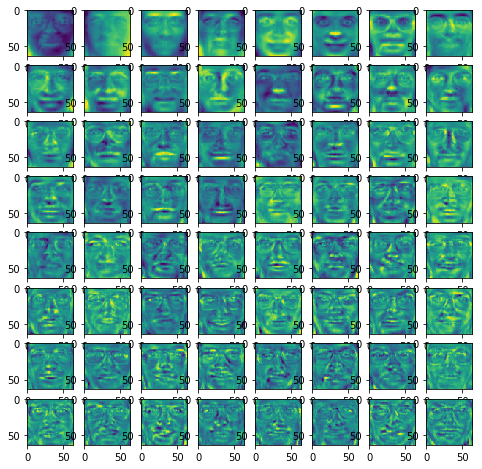

In [41]:
fig=plt.figure(figsize=(8,8))   
for i in range(64):                                
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i])                                   
plt.show()   

In [42]:
# ##see that earlier we had 4096 pixels, many of them defined the same thing. eg. if a blue pixel defined the sky, then many 
#others aroung it
#also did the same. But here, we have 260 pixels and each of them conveys something meaningful(if one defines nose textures
#the other defines spectacles(this time we don't have many redundant features)). This is very interesting as it could be used to 
#recognize images by defining nose,eyes,spectacles etc.....
#Try and equate this to the result we see on normal(non-image) data when we apply PCA, on it. For example, in a course 
#dataset, suppose there are 5 features that convey job_prospects after completing that course, now they can be combined to
#produce a single resultant feature, which conveys something more meaningful than the 5 separately
#The resultant pixels in the above image, can be thought of as 1 in the nose direction in the original 4096D space, 1 in the
#spectacle direction, 1 in the lips direction......
#earlier, they didn't define any particular texture direction, they were just 4096 axes.